In [11]:
!pip install yolov8face

In [12]:
from ultralytics import YOLO
from yolov8face import get_bbox
import cv2
from google.colab.patches import cv2_imshow
import os


image 1/1 /content/face.jpg: 384x640 300 faces, 103.7ms
Speed: 1.9ms preprocess, 103.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


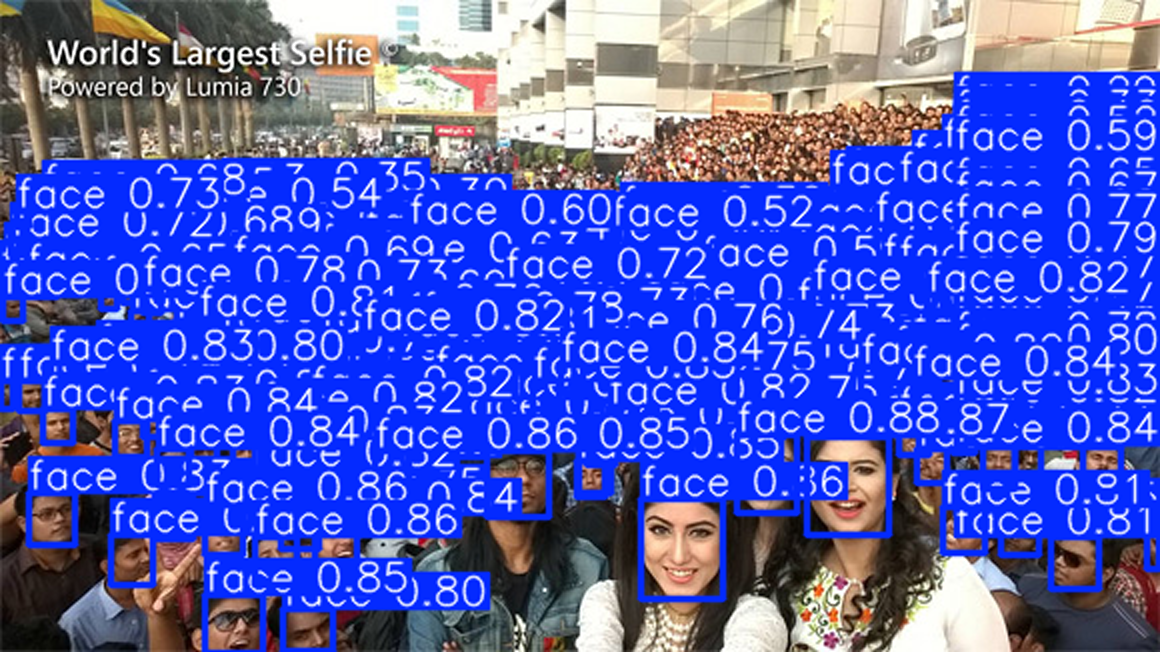

In [19]:
model=YOLO("yolov8n-face.pt")

results=model.predict(source="face.jpg")

# # 첫 번째 결과 이미지에 박스 그린 이미지 가져오기
# img=results[0].plot()
# cv2_imshow(img)
img=results[0].plot()
img_resize = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
cv2_imshow(img_resize)


image 1/1 /content/cha.jpg: 640x448 1 face, 116.7ms
Speed: 2.3ms preprocess, 116.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


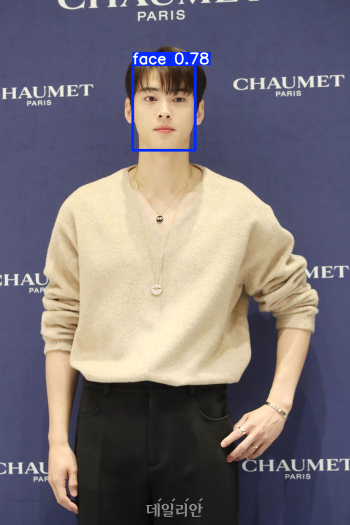

In [20]:
r=model.predict(source="cha.jpg")   # show 코랩에서 안됨

# 첫 번째 결과 이미지에 박스 그린 이미지 가져오기
img=r[0].plot()
img_size=cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(img_size)

In [ ]:
img_path='face.jpg'

In [ ]:
# 저장할 폴더 생성
os.makedirs("selected_faces", exist_ok=True)

# 감지된 박스 좌표 얻기 (x1, y1, x2, y2)
boxes=r[0].boxes.xyxy.cpu().numpy()

# 원본 이미지 로드 (BGR)
original_img=cv2.imread("cha.jpg")

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)
    face_crop=original_img[y1:y2, x1:x2]  # 얼굴 영역만 자르기

    # 파일로 저장
    save_path = f"selected_faces/face_{i}.jpg"
    cv2.imwrite(save_path, face_crop)
    print(f"face_{i}.jpg 저장 완료")

print(f"총 {len(boxes)}개의 얼굴 이미지를 selected_faces 폴더에 저장했습니다.")

face_0.jpg 저장 완료
총 1개의 얼굴 이미지를 selected_faces 폴더에 저장했습니다.


In [ ]:
# 잘라낸 얼굴 이미지를 CNN 모델 입력 크기에 맞게 전처리 (예: 48x48, 64x64 픽셀)
# CNN(VGG 등등) 모델에 넣어 감정 분류 (예: 행복, 슬픔, 분노, 놀람 등) 수행